In [10]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def z(n, c):
    if n == 0:
        return 0
    else:
        return z(n - 1, c) ** 2 + c

In [3]:
c = -1 + 1/4j
for n in range(10):
    no = z(n, c = c)
    print(f"z({n}) = {no}, |z({n})|= {abs(no)}")

z(0) = 0, |z(0)|= 0
z(1) = (-1-0.25j), |z(1)|= 1.0307764064044151
z(2) = (-0.0625+0.25j), |z(2)|= 0.2576941016011038
z(3) = (-1.05859375-0.28125j), |z(3)|= 1.0953183510007776
z(4) = (0.0415191650390625+0.345458984375j), |z(4)|= 0.3479450401298277
z(5) = (-1.1176180688198656-0.22131366282701492j), |z(5)|= 1.1393199221933037
z(6) = (0.2000904103987362+0.24468829690435856j), |z(6)|= 0.3160831140309305
z(7) = (-1.0198361903084208-0.15208043650527817j), |z(7)|= 1.03111314327305
z(8) = (0.016937395895157525+0.06019426597196914j), |z(8)|= 0.06253179219895637
z(9) = (-1.0033364742761948-0.2479609317732287j), |z(9)|= 1.0335224740172964


In [4]:
def z_seq(c, z = 0):
    while True:
        yield z
        z = z ** 2 + c

In [5]:
c = -1 + 1/4j
for n, z in enumerate(z_seq(c = c)):
    print(f"z({n}) = {no}, |z({n})|= {abs(no)}")
    if n >= 9:
        break

z(0) = (-1.0033364742761948-0.2479609317732287j), |z(0)|= 1.0335224740172964
z(1) = (-1.0033364742761948-0.2479609317732287j), |z(1)|= 1.0335224740172964
z(2) = (-1.0033364742761948-0.2479609317732287j), |z(2)|= 1.0335224740172964
z(3) = (-1.0033364742761948-0.2479609317732287j), |z(3)|= 1.0335224740172964
z(4) = (-1.0033364742761948-0.2479609317732287j), |z(4)|= 1.0335224740172964
z(5) = (-1.0033364742761948-0.2479609317732287j), |z(5)|= 1.0335224740172964
z(6) = (-1.0033364742761948-0.2479609317732287j), |z(6)|= 1.0335224740172964
z(7) = (-1.0033364742761948-0.2479609317732287j), |z(7)|= 1.0335224740172964
z(8) = (-1.0033364742761948-0.2479609317732287j), |z(8)|= 1.0335224740172964
z(9) = (-1.0033364742761948-0.2479609317732287j), |z(9)|= 1.0335224740172964


In [6]:
def mandelbrot(candidate):
    return sequence(z = 0, c = candidate)

def julia(candidate, parameter):
    return sequence(z = candidate, c = parameter)

In [7]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))

    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [8]:
def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c

    return abs(z) <= 2

In [9]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)

    return c[mask]

/var/folders/1r/gqndfx510m989945lxrv5rn471yynn/T/ipykernel_64198/1058933356.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
/var/folders/1r/gqndfx510m989945lxrv5rn471yynn/T/ipykernel_64198/1058933356.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


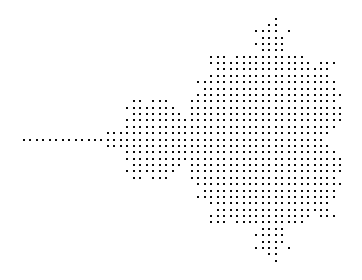

In [11]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=21)
members = get_members(c, num_iterations=20)

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

/var/folders/1r/gqndfx510m989945lxrv5rn471yynn/T/ipykernel_64198/1058933356.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
/var/folders/1r/gqndfx510m989945lxrv5rn471yynn/T/ipykernel_64198/1058933356.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


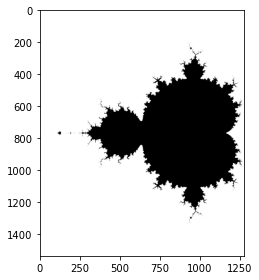

In [13]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)

plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
#plt.axis("off")
plt.tight_layout()
plt.show()